# Etapas

- Importação da Base de Dados
- Tratamento dos Dados
- Cálculos
- Envio dos e-mails

In [26]:
# Importando bibliotecas e Base de Dados
import pandas as pd
import matplotlib.pyplot as plt
df_vendas = pd.read_excel('vendas.xlsx')

In [27]:
df_vendas.head(5)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


## Tratamento dos Dados

In [28]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Código Venda    100999 non-null  int64         
 1   Data            100999 non-null  datetime64[ns]
 2   ID Loja         100999 non-null  object        
 3   Produto         100999 non-null  object        
 4   Quantidade      100999 non-null  int64         
 5   Valor Unitário  100999 non-null  int64         
 6   Valor Final     100999 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.4+ MB


##### Removendo Colunas Desnecessárias e Renomeando

In [29]:
nomes_colunas = {
    'Código Venda':'ID_VENDA',
    'Data':'DATA',
    'ID Loja':'ID_LOJA',
    'Produto':'PRODUTO',
    'Quantidade':'QTD',
    'Valor Unitário':'VLR_UNIT',
    'Valor Final':'VLR_FINAL'
}
df_vendas.rename(columns=nomes_colunas, inplace=True)
df_vendas.drop(columns=['DATA', 'ID_VENDA'], inplace=True)
df_vendas.head(5)

,ID_LOJA,PRODUTO,QTD,VLR_UNIT,VLR_FINAL
0,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,Iguatemi Esplanada,Camiseta,2,180,360
2,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,Norte Shopping,Relógio,3,200,600
4,Norte Shopping,Chinelo Liso,1,71,71


## Cálculos

### Faturamento por Loja

In [30]:
faturamento_lojas = df_vendas[['ID_LOJA', 'VLR_FINAL']].groupby('ID_LOJA').sum()
faturamento_lojas.head(3)

,VLR_FINAL
ID_LOJA,
Bourbon Shopping SP,1726110
Center Shopping Uberlândia,1668921
Iguatemi Campinas,1762419


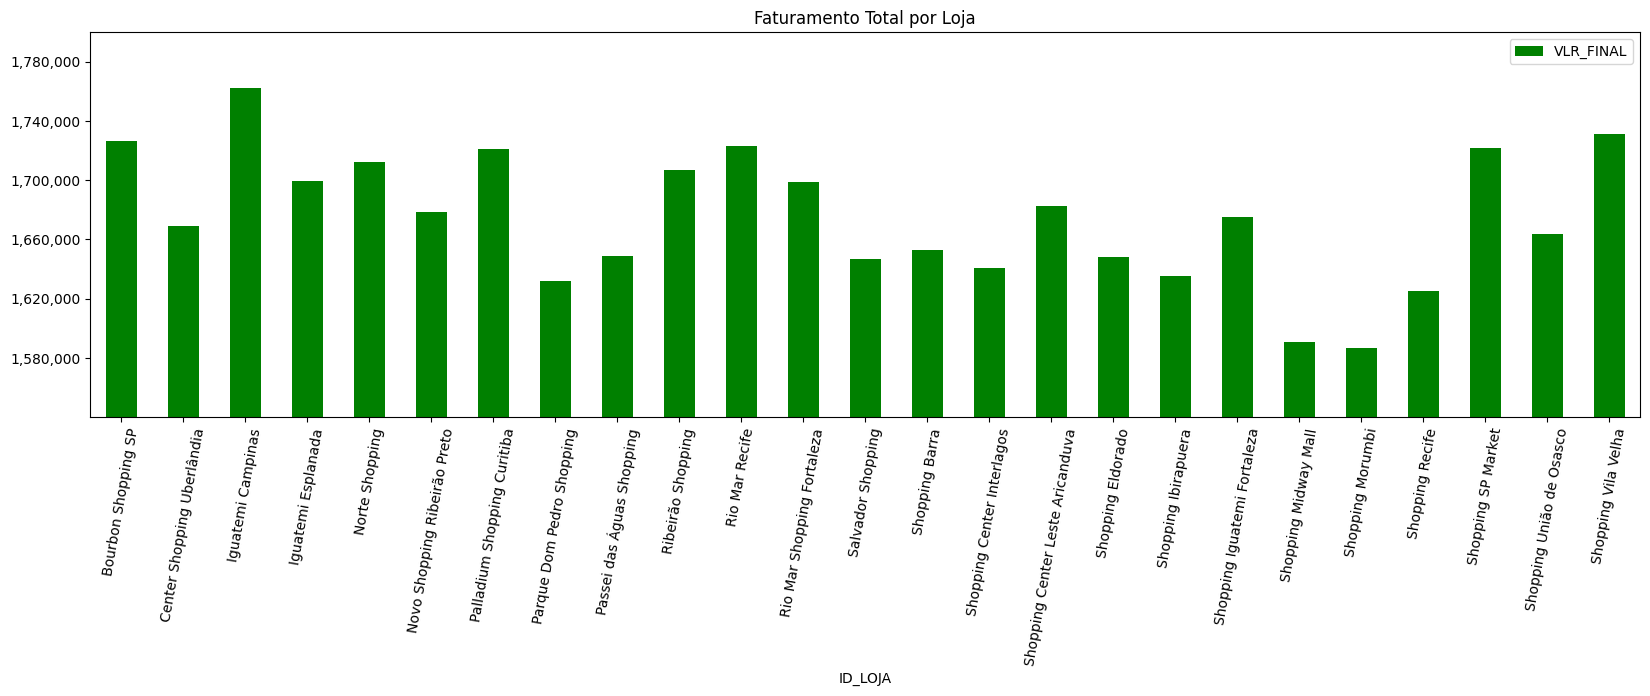

Loja com o Maior Faturamento: Iguatemi Campinas - R$ 1,762,419.00
Loja com o Menor Faturamento: Shopping Morumbi - R$ 1,586,444.00


In [31]:
fig, ax = plt.subplots(figsize=(20,5))
faturamento_lojas.plot.bar(rot=80, title='Faturamento Total por Loja', ax=ax, color='green')
y_labels = [1580000, 1620000, 1660000, 1700000, 1740000, 1780000]
ax.set_ylim(1540000, 1800000)
ax.set_yticks(y_labels)
ax.set_yticklabels([f'{val:,.0f}' for val in y_labels])
plt.savefig('faturamento_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

# Maior e Menor faturamento
graf_faturamento_lojas = faturamento_lojas.reset_index()
indice = graf_faturamento_lojas['VLR_FINAL'].idxmax()
id_maior = graf_faturamento_lojas.at[indice, 'ID_LOJA']
maior_fat = max(graf_faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Maior Faturamento: {id_maior} - R$ {maior_fat:,.2f}')

indice = graf_faturamento_lojas['VLR_FINAL'].idxmin()
id_menor = graf_faturamento_lojas.at[indice, 'ID_LOJA']
menor_fat = min(graf_faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Menor Faturamento: {id_menor} - R$ {menor_fat:,.2f}')

## Quantidade de Produtos Vendidos por Loja

In [32]:
vendas_lojas = df_vendas[ ['ID_LOJA', 'QTD'] ].groupby('ID_LOJA').sum()
display(vendas_lojas)

,QTD
ID_LOJA,
Bourbon Shopping SP,8863
Center Shopping Uberlândia,8627
Iguatemi Campinas,8935
Iguatemi Esplanada,8580
Norte Shopping,9014
Novo Shopping Ribeirão Preto,8751
Palladium Shopping Curitiba,9091
Parque Dom Pedro Shopping,8388
Passei das Águas Shopping,8618


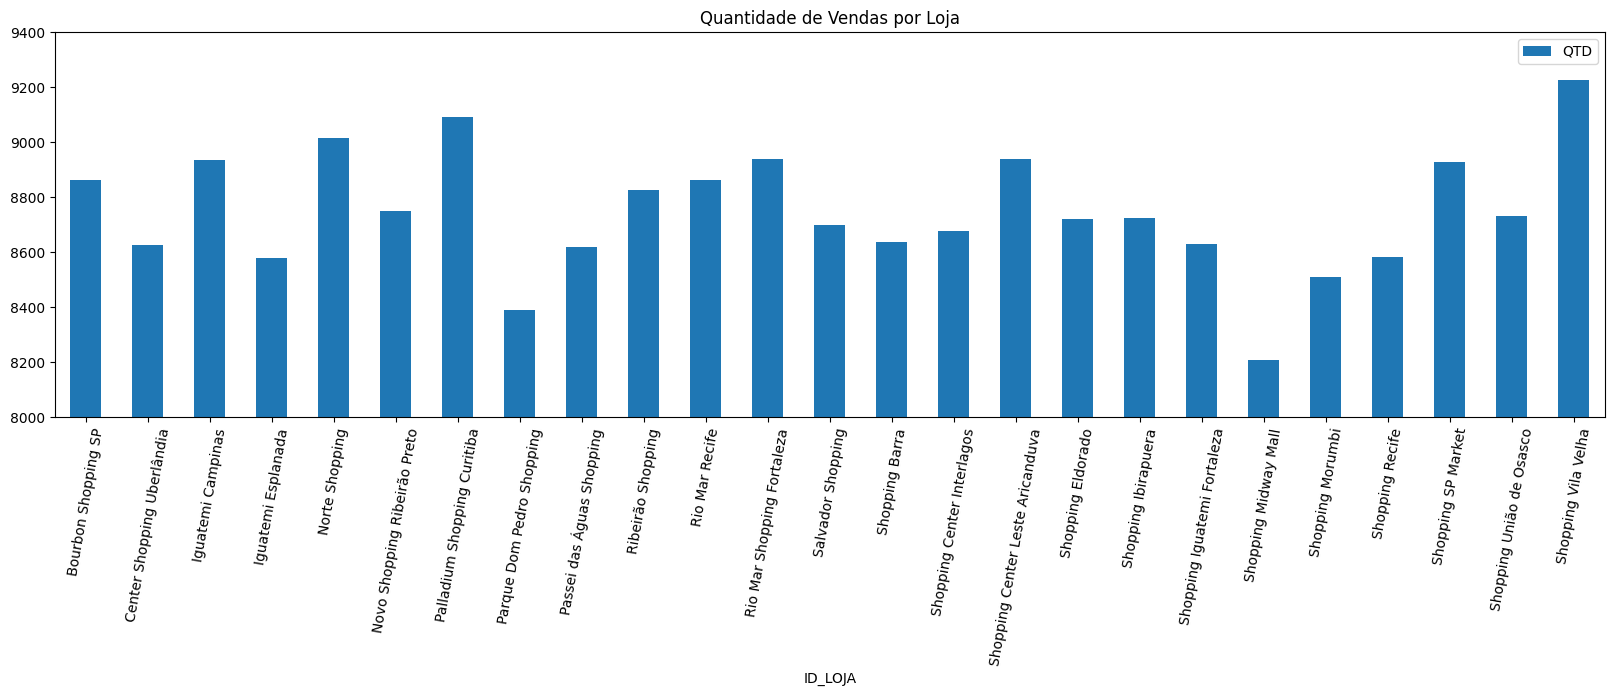

Loja com Maior Quantidade de Vendas: Shopping Vila Velha - 9224 vendas
Loja com Menor Quantidade de Vendas: Shopping Midway Mall - 8206 vendas


In [33]:
fig, ax = plt.subplots(figsize=(20,5))
vendas_lojas.plot.bar(rot=80, title='Quantidade de Vendas por Loja', ax=ax)
y_labels = [8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400]
ax.set_ylim(8000, 9400)
ax.set_yticks(y_labels)
ax.set_yticklabels([f'{val:.0f}' for val in y_labels])
plt.savefig('qtd_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

## Maior e Menor Quantidades
graf_vendas_lojas = vendas_lojas.reset_index()

indice = graf_vendas_lojas['QTD'].idxmax()
id_maior = graf_vendas_lojas.at[indice, 'ID_LOJA']
maior_qtd = max(graf_vendas_lojas['QTD'])
print(f'Loja com Maior Quantidade de Vendas: {id_maior} - {maior_qtd:.0f} vendas')

indice = graf_vendas_lojas['QTD'].idxmin()
id_menor = graf_vendas_lojas.at[indice, 'ID_LOJA']
menor_qtd = min(graf_vendas_lojas['QTD'])
print(f'Loja com Menor Quantidade de Vendas: {id_menor} - {menor_qtd:.0f} vendas')

## Ticket Médio

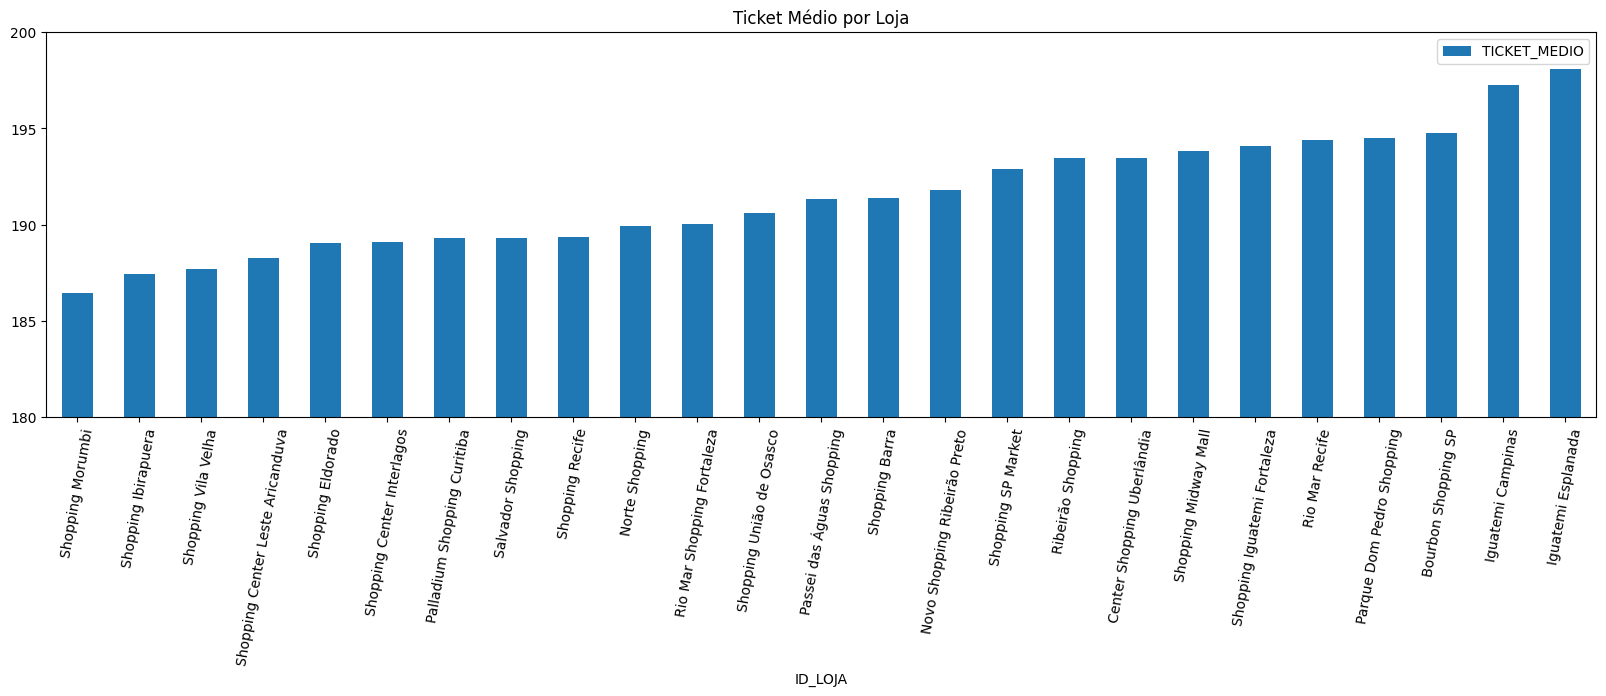

Loja com Maior Ticket Médio: Iguatemi Esplanada - R$ 198.10
Loja com Menor Ticket Médio: Shopping Morumbi - R$ 186.46


In [36]:
# ticket medio = faturamento / qtd
ticket_medio = (faturamento_lojas['VLR_FINAL'] / vendas_lojas['QTD']).to_frame()
ticket_medio = ticket_medio.rename(columns={0:'TICKET_MEDIO'})
ticket_medio = ticket_medio.sort_values(by='TICKET_MEDIO')


fig, ax = plt.subplots(figsize=(20,5))
ticket_medio.plot.bar(rot=80, title='Ticket Médio por Loja', ax=ax)
y_labels = [180, 185, 190, 195, 200]
ax.set_ylim(180, 200)
ax.set_yticks(y_labels)
ax.set_yticklabels([f'{val:.0f}' for val in y_labels])
plt.savefig('ticket_lojas.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

# Maior e Menor Quantidades
graf_ticket_medio = ticket_medio.reset_index()

indice = graf_ticket_medio['TICKET_MEDIO'].idxmax()
id_maior = graf_ticket_medio.at[indice, 'ID_LOJA']
maior_ticket = max(graf_ticket_medio['TICKET_MEDIO'])
print(f'Loja com Maior Ticket Médio: {id_maior} - R$ {maior_ticket:.2f}')

indice = graf_ticket_medio['TICKET_MEDIO'].idxmin()
id_menor = graf_ticket_medio.at[indice, 'ID_LOJA']
menor_ticket = min(graf_ticket_medio['TICKET_MEDIO'])
print(f'Loja com Menor Ticket Médio: {id_menor} - R$ {menor_ticket:.2f}')